<a href="https://colab.research.google.com/github/Felipe-Oliveira11/Clustering-ML/blob/master/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### <b>Clustering</b>
<br>


##### <b> O que é Clustering ? </b> 
Clusterização é a tarefa de dividir a população ou os pontos de dados em vários grupos, de modo que os pontos de dados nos mesmos grupos sejam mais semelhantes a outros pontos de dados no mesmo grupo do que os de outros grupos. Em palavras simples, o objetivo é segregar grupos com traços semelhantes e atribuí-los a clusters.



A análise de agrupamento pode ser feita com base nos recursos em que tentamos encontrar subgrupos de amostras com base em recursos ou com base em amostras em que tentamos encontrar subgrupos de recursos com base em amostras. Abordaremos aqui o clustering com base nos recursos. O clustering é usado na segmentação de mercado; onde tentamos multar clientes que são semelhantes entre si, seja em termos de comportamentos ou atributos, segmentação / compactação de imagens; onde tentamos agrupar regiões semelhantes, agrupar documentos com base em tópicos etc.

<br>



<b>Contexto</b>
Esse conjunto de dados é criado apenas para fins de aprendizado dos conceitos de segmentação de clientes, também conhecidos como análise de cesta de mercado. Vou demonstrar isso usando a técnica de ML não supervisionada (algoritmo de agrupamento do KMeans) da forma mais simples.


<br>

<b>Declaração do problema </b>
 O proprietário do shopping  deseja entender os clientes como quem pode convergir facilmente [clientes-alvo] para que seja possível dar sentido à equipe de marketing e planejar a estratégia adequadamente.




<b>Inspiração</b>
Ao final deste estudo de caso, você poderá responder às perguntas abaixo.
* 1- Como alcançar a segmentação de clientes usando o algoritmo de aprendizado de máquina (KMeans Clustering) em Python da maneira mais simples.
* 2- Quem são seus clientes-alvo com quem você pode iniciar a estratégia de marketing [fácil de conversar]
* 3- Como a estratégia de marketing funciona no mundo real

<br>
<hr>
<br>



<p align=center>
<img src="https://miro.medium.com/max/1280/1*5UHmgCaTD8EegsPuKcxC1Q.png" width="50%"></p>





<br>
<hr>

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from scipy.cluster.hierarchy import fcluster, linkage, dendrogram
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
path = '/content/drive/My Drive/Inteligência Artificial - Notebooks /ML - Não supervisionado /Clustering/Mall_Customers.csv'
data = pd.read_csv(path)
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
data.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

### Visualização de dados 


<br>
<hr>

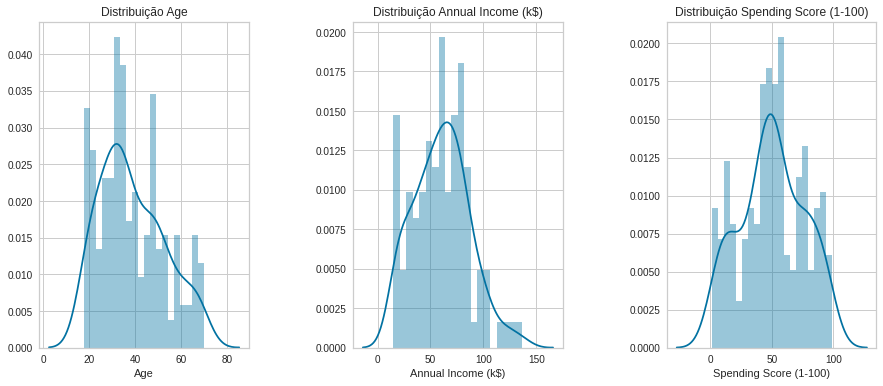

In [ ]:
plt.figure(figsize = (15 , 6))
count = 0 
for feature in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    count += 1
    plt.subplot(1,3,count)
    plt.subplots_adjust(hspace=0.5 , wspace=0.5)
    sns.distplot(data[feature], bins=20)
    plt.title('Distribuição {}'.format(feature))
plt.show()

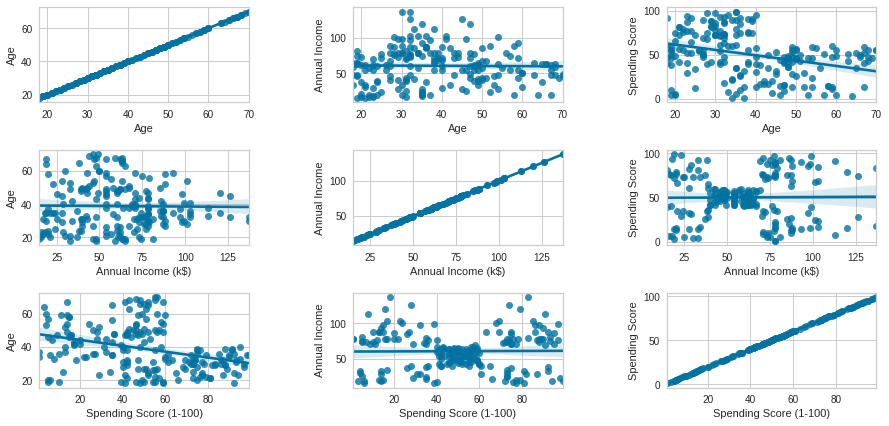

In [ ]:
plt.figure(figsize=(15,7))
count = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    for y in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
        count += 1
        plt.subplot(3,3, count)
        plt.subplots_adjust(hspace=0.5, wspace=0.5)
        sns.regplot(x=x, y=y, data=data)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

<br>
<hr>
<br>
<br>


### <b>K-Means</b> 


<br>

O algoritmo Kmeans é um algoritmo iterativo que tenta particionar o conjunto de dados em K subgrupos (clusters) distintos e não sobrepostos distintos predefinidos, onde cada ponto de dados pertence a apenas um grupo . Ele tenta tornar os pontos de dados intra-cluster o mais semelhante possível, além de manter os clusters o mais diferentes possível. Ele atribui pontos de dados a um cluster de modo que a soma da distância ao quadrado entre os pontos de dados e o centróide do cluster (média aritmética de todos os pontos de dados que pertencem a esse cluster) seja mínima. Quanto menor a variação que temos nos clusters, mais homogêneos (semelhantes) os pontos de dados estão no mesmo cluster.


<br>


A função objetivo é: 
<br>

<p align=center>
<img src="https://miro.medium.com/max/548/1*myXqNCTZH80uvO2QyU6F5Q.png" width="50%"></p>






<hr>
<br>

In [ ]:
# features 
X = data[['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)']]

# One hot encoding 
encoding = OneHotEncoder(sparse=False)
X['Gender'] = encoding.fit_transform(X[['Gender']])


# StandardScaler 
scaler = StandardScaler()
X = scaler.fit_transform(X)


# K-Means 
model = KMeans(n_clusters=4, init='k-means++', max_iter=100, random_state=42)
model.fit(X)


# labels 
labels = model.labels_


# centroids 
centroids = model.cluster_centers_


# números de clusters
print('Número de clusters: ', model.n_clusters)


# metrics 
print('Silhoutte:', silhouette_score(X, labels))
print('Davies-Bouldin:', davies_bouldin_score(X, labels))

Número de clusters:  4
Silhoutte: 0.30147139473252726
Davies-Bouldin: 1.27019355260916


<br>
<br>


### Ínercia X Número de clusters

O gráfico de trade-off de inércia em relação ao número de clusters é uma técnica de identificar o melhor valor de K possível, que faça com que o cluster seja compacto e com uma disersão de pontos menor.

<br>

In [ ]:
# neste exemplot vou utilizar apenas duas features do conjunto
X1 = data[['Age' , 'Spending Score (1-100)']]
inercia = []
for k in range(1 , 11):
    kmeans = KMeans(n_clusters=k,
                     init='k-means++',
                     n_init=10,
                     max_iter=100, 
                     random_state=42,
                     algorithm='elkan')
    kmeans.fit(X1)
    inercia.append(kmeans.inertia_)

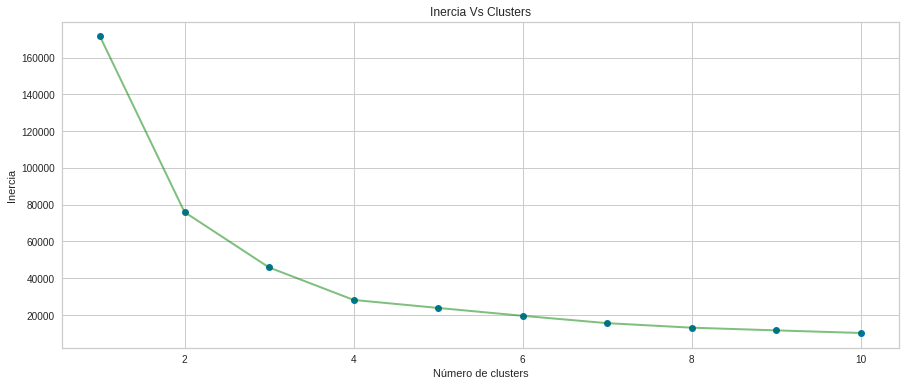

In [ ]:
# Curva Inércia Vs Número de clusters

plt.figure(figsize = (15 ,6))
plt.plot(np.arange(1 , 11), inercia, 'o')
plt.plot(np.arange(1 , 11) , inercia, '-', color='green',alpha = 0.5, lw=2)
plt.title('Inercia Vs Clusters')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.show()

In [ ]:
# Número de centróides definido 

kmeans = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_
print('Silhoutte:', silhouette_score(X, labels))
print('Davies-Bouldin:', davies_bouldin_score(X, labels))

Silhoutte: 0.30147139473252726
Davies-Bouldin: 1.27019355260916


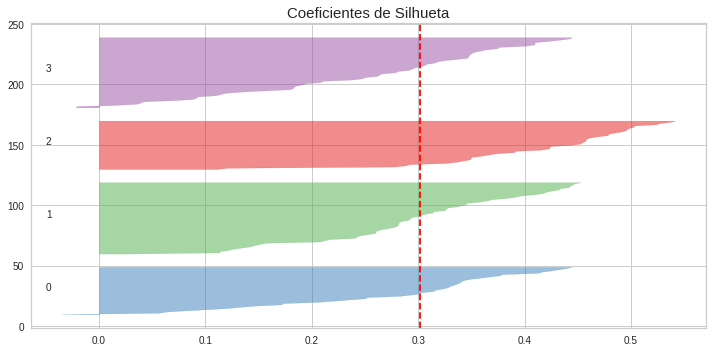

In [ ]:
# Coeficientes de Silhueta 

fig, ax = plt.subplots(figsize=(10,5))
plt.title('Coeficientes de Silhueta', fontsize=15)
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick', ax=ax)
visualizer.fit(X)
plt.tight_layout()

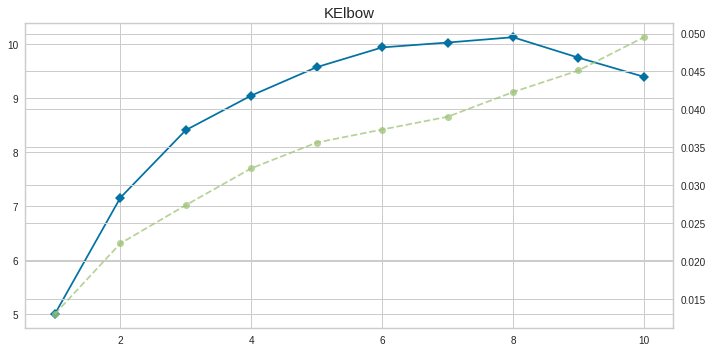

In [ ]:
# Método cotovelo 

fig, ax = plt.subplots(figsize=(10,5))
plt.title('KElbow', fontsize=15)
visualizer = KElbowVisualizer(KMeans(), k=(1,11))
visualizer.fit(X)
plt.tight_layout()

<br>
No método do Cotovelo, sempre optamos por escolher um valor de K baixo com uma inércia também bem reduzida, pois o melhor valor de K será K= número de instâncias, por essa razão encontrar um valor de K baixo com uma baixa inércia é o objetivo central. 

<br>
<hr>

### Cluster Hierarquico 
<br>

Outro método de clustering do aprendizado não-supervisionado. 
Em geral, as mesclagens e divisões são determinadas de maneira gulosa. Os resultados do agrupamento hierárquico são geralmente apresentados em um dendrograma. 


<br>


<p align=center>
<img src="https://miro.medium.com/max/1254/1*KpYv1mhEaJbbafiC5udHPA.png" width="50%"></p>


<br>

In [ ]:
# com scikit-learn  
hc = AgglomerativeClustering(n_clusters=4, affinity='euclidean')
hc.fit(X)
labels_hc = hc.labels_


# metricas 
print('Silhoutte:', silhouette_score(X, labels_hc))
print('Davies-Bouldin:', davies_bouldin_score(X, labels_hc))

Silhoutte: 0.2926024466238545
Davies-Bouldin: 1.3032576131622668


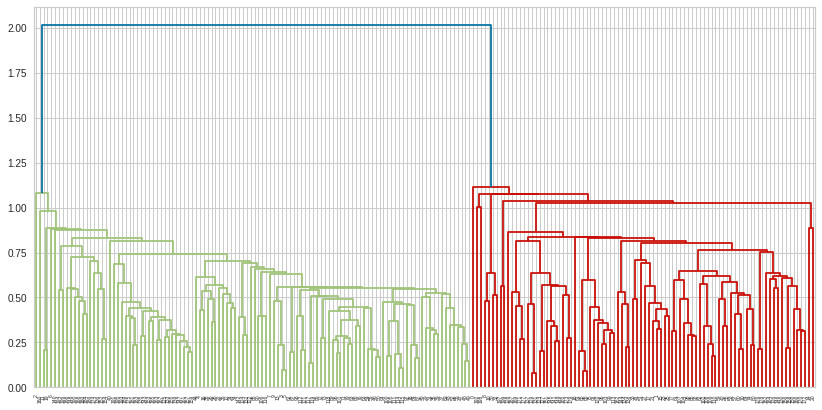

In [ ]:
# com scipy 
distance_matrix = linkage(X, metric='euclidean')

# dendograma 
fig, ax = plt.subplots(figsize=(14,7))
dendograma = dendrogram(distance_matrix, ax=ax)
plt.show()

In [ ]:
hierarquico = fcluster(distance_matrix, 4, criterion='maxclust')
print('Silhouette: {} '.format(silhouette_score(X,hierarquico)))

Silhouette: 0.11737227748213624 


<br>
<hr>
<br>


### DBSCAN 
<br>


DBSCAN - Clustering espacial de aplicativos com base em densidade. Localiza amostras principais de alta densidade e expande clusters a partir delas. Bom para dados que contêm clusters de densidade semelhante.


##### <b> Funcionamento do DBSCAN </b>

Considere um conjunto de pontos em algum espaço a ser agrupado. Seja ε um parâmetro que especifica o raio de uma vizinhança em relação a algum ponto. Para efeitos de aglomeração DBSCAN, os pontos são classificados como pontos centrais , ( densidade -) pontos alcançáveis e valores extremos , como segue:


<br>

<p align=center>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/af/DBSCAN-Illustration.svg/400px-DBSCAN-Illustration.svg.png" width="50%"></p>

<br>


Um ponto p é um ponto central se pelo menos pontos minPts estiverem a uma distância ε dele (incluindo p ).
Um ponto q é diretamente acessível a partir de p se o ponto q estiver a uma distância ε do ponto central p . Diz-se que os pontos são alcançáveis ​​apenas diretamente dos pontos principais.
Um ponto q é acessível a partir de p , se existe um caminho p 1 , ..., p n com p 1 = p e p n = Q , em que cada p i 1 é directamente acessível a partir de p i . Observe que isso implica que o ponto inicial e todos os pontos no caminho devem ser pontos principais, com a possível exceção de q .
Todos os pontos inacessíveis a partir de qualquer outro ponto são valores discrepantes ou de ruído .
Agora, se p é um ponto central, ele forma um cluster junto com todos os pontos (principais ou não centrais) que são acessíveis a partir dele. Cada cluster contém pelo menos um ponto principal; pontos não essenciais podem fazer parte de um cluster, mas formam sua "borda", pois não podem ser usados ​​para alcançar mais pontos.

<br>
<br>

##### <b> Etapas do algoritmo </b>

O algoritmo DBSCAN pode ser abstraído nas seguintes etapas: 

 1. Encontre os pontos na vizinhança ε (eps) de cada ponto e identifique os pontos principais com mais de minPts vizinhos.
 2. Encontre os componentes conectados dos pontos principais no gráfico vizinho, ignorando todos os pontos não essenciais.
 3.Atribua cada ponto não central a um cluster próximo se o cluster for um vizinho ε (eps), caso contrário, atribua-o ao ruído.
Uma implementação ingênua disso exige o armazenamento das vizinhanças na etapa 1, exigindo, assim, memória substancial. 









<br>

In [ ]:
# DBSCAN 
dbscan = DBSCAN(eps=1, min_samples=5, metric='euclidean', algorithm='auto')
dbscan.fit(X)
labels_db = dbscan.labels_


print('Silhoutte:', silhouette_score(X, labels_db))
print('Davies-Bouldin:', davies_bouldin_score(X, labels_db))

Silhoutte: 0.21646726918452225
Davies-Bouldin: 3.218432787675814


<br>
<hr>